In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

We generate 3 Clusters and do hierarchical_clustering

Z.shape: (899, 4)


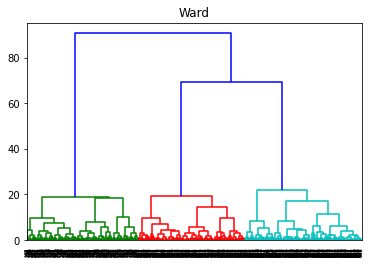

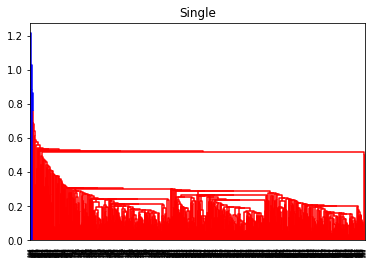

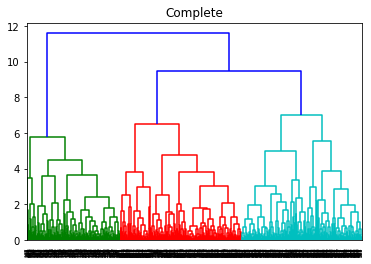

In [ ]:
def main():
    D = 2 # so we can visualize it more easily
    s = 4 # separation so we can control how far apart the means are
    mu1 = np.array([0, 0])
    mu2 = np.array([s, s])
    mu3 = np.array([0, s])

    N = 900 # number of samples
    X = np.zeros((N, D))
    X[:300, :] = np.random.randn(300, D) + mu1
    X[300:600, :] = np.random.randn(300, D) + mu2
    X[600:, :] = np.random.randn(300, D) + mu3
#Euclidean distance
    Z = linkage(X, 'ward')
    print("Z.shape:", Z.shape)
    # Z has the format [idx1, idx2, dist, sample_count]
    # therefore, its size will be (N-1, 4)

    # from documentation:
    # A (n-1) by 4 matrix Z is returned. At the i-th iteration,
    # clusters with indices Z[i, 0] and Z[i, 1] are combined to
    # form cluster n + i. A cluster with an index less than n
    # corresponds to one of the original observations.
    # The distance between clusters Z[i, 0] and Z[i, 1] is given
    # by Z[i, 2]. The fourth value Z[i, 3] represents the number
    # of original observations in the newly formed cluster.
    plt.title("Ward")
    dendrogram(Z)
    plt.show()
#distance between nearest points 
    Z = linkage(X, 'single')
    plt.title("Single")
    dendrogram(Z)
    plt.show()
#distance between farthest points
    Z = linkage(X, 'complete')
    plt.title("Complete")
    dendrogram(Z)
    plt.show()


if __name__ == '__main__':
    main()

Genetic ALgorithm for Hierarchical Clustering

In [ ]:
import scipy.spatial.distance as ssd
import random

Genetic Code

In [ ]:
code = ['A', 'T', 'C', 'G']

In [ ]:
# convert list of integers to corresponding letters
def to_code(a):
  return [code[i] for i in a]


In [ ]:
# distance between 2 DNA strands
def dist(a, b):
  return sum(i != j for i, j in zip(a, b))

In [ ]:
# generate offspring by modifying some characters in the code
def generate_offspring(parent):
  return [maybe_modify(c) for c in parent]


In [ ]:
# modify letter c with probability ~1/1000
def maybe_modify(c):
  if np.random.random() < 0.001:
    return np.random.choice(code)
  return c

In [ ]:
# create 3 distinct ancestors
p1 = to_code(np.random.randint(4, size=1000))
p2 = to_code(np.random.randint(4, size=1000))
p3 = to_code(np.random.randint(4, size=1000))

In [ ]:
# create offspring
num_generations = 99
max_offspring_per_generation = 1000
current_generation = [p1, p2, p3]
for i in range(num_generations):

  next_generation = []
  for parent in current_generation:
    # each parent will have between 1 and 3 children
    num_offspring = np.random.randint(3) + 1

    # generate the offspring
    for _ in range(num_offspring):
      child = generate_offspring(parent)
      next_generation.append(child)

  current_generation = next_generation

  # limit the number of offspring
  random.shuffle(current_generation)
  current_generation = current_generation[:max_offspring_per_generation]

  print("Finished creating generation %d / %d, size = %d" % (i + 2, num_generations + 1, len(current_generation)))







Finished creating generation 2 / 100, size = 8
Finished creating generation 3 / 100, size = 17
Finished creating generation 4 / 100, size = 33
Finished creating generation 5 / 100, size = 67
Finished creating generation 6 / 100, size = 144
Finished creating generation 7 / 100, size = 289
Finished creating generation 8 / 100, size = 564
Finished creating generation 9 / 100, size = 1000
Finished creating generation 10 / 100, size = 1000
Finished creating generation 11 / 100, size = 1000
Finished creating generation 12 / 100, size = 1000
Finished creating generation 13 / 100, size = 1000
Finished creating generation 14 / 100, size = 1000
Finished creating generation 15 / 100, size = 1000
Finished creating generation 16 / 100, size = 1000
Finished creating generation 17 / 100, size = 1000
Finished creating generation 18 / 100, size = 1000
Finished creating generation 19 / 100, size = 1000
Finished creating generation 20 / 100, size = 1000
Finished creating generation 21 / 100, size = 1000


In [ ]:
# create distance matrix
N = len(current_generation)
dist_matrix = np.zeros((N, N))
for i in range(N):
  for j in range(N):
    if i == j:
      continue
    elif j > i:
      a = current_generation[i]
      b = current_generation[j]
      dist_matrix[i,j] = dist(a, b)
    else:
      dist_matrix[i,j] = dist_matrix[j,i]

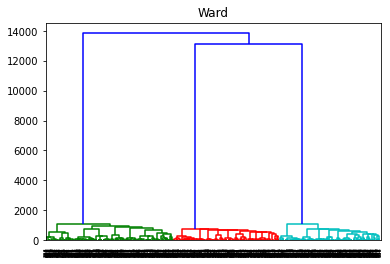

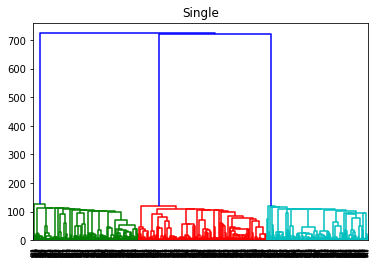

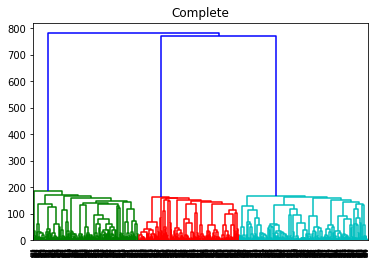

In [ ]:
dist_array = ssd.squareform(dist_matrix)

Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z)
plt.show()

Z = linkage(dist_array, 'single')
plt.title("Single")
dendrogram(Z)
plt.show()

Z = linkage(dist_array, 'complete')
plt.title("Complete")
dendrogram(Z)
plt.show()

In [ ]:
print(N)

1000
